# NETID: <fill in here\>

# Assessing Model Accuracy
In this lesson, we look over different ways to evaluate whether machine learning models you have created successfully accomplish their intended objective.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

weather = pd.read_csv('lecture5dataA.csv').dropna()
noncategorical = [weather.columns[i] for i in range (3,11) if i != 9]
print ("Noncategorical Features: ", noncategorical)
weather.head()

Noncategorical Features:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Loss Functions and Accuracy

In evaluating your models, it's important to remember that different models must be evaluated with the appropriate metric. Classification accuracy is not, for example, the same thing as the mean-squared error used in regression problems. Furthermore, a high score in either of those metrics does not prove a model is "good". 

## <span style="color:green"><em>Problem 1</em></span>
Edit the lines marked with TODO's below to do the following:
1. Create two columns to `temperatures` to store Temperature and Apparent Temperature in Rankines. Rankines is a  weird unit of temperature. Temperature in Rankines is 9/5 * (temperature in Celcius) + 491.67.
2. Train and predict two models: one for celcius and one for rankines
3. Compare the results

In [2]:
temperatures = weather.loc[:,["Temperature (C)", "Apparent Temperature (C)"]]
temperatures["Temperature (R)"] = 9/5*temperatures["Temperature (C)"] + 491.67 
temperatures["Apparent Temperature (R)"] = 9/5*temperatures["Apparent Temperature (C)"] + 491.67 

In [3]:
celcius_model = LinearRegression()
# Make sure that the names of your data for the two models are different! Otherwise, one will overwrite the other
# Then, fit the model.
X_C = temperatures[["Apparent Temperature (C)"]]
Y_C = temperatures["Temperature (C)"]
x_tr_C, x_te_C, y_tr_C, y_te_C = train_test_split(X_C, Y_C, test_size=0.2)
celcius_model.fit(x_tr_C, y_tr_C)

rankines_model = LinearRegression()
# TODO same as above, but for rankines
X_R = temperatures[["Apparent Temperature (R)"]]
Y_R = temperatures["Temperature (R)"]
x_tr_R, x_te_R, y_tr_R, y_te_R = train_test_split(X_R, Y_R, test_size=0.2)
rankines_model.fit(x_tr_R, y_tr_R)

LinearRegression()

In [4]:
from sklearn.metrics import mean_squared_error

# TODO store the predictions for the test sets
celcius_predictions = celcius_model.predict(x_te_C)
rankines_predictions = rankines_model.predict(x_te_R)

# TODO find mean squared error of each model's predictions
celcius_MSE = mean_squared_error(y_te_C, celcius_predictions) # TODO
rankines_MSE = mean_squared_error(y_te_R, rankines_predictions) # TODO

print("celcius MSE:", celcius_MSE)
print("rankines MSE:", rankines_MSE)
print("\n(if the MSE for rankines is 0, you missed something two cells above)")

celcius MSE: 1.347969510449138
rankines MSE: 4.336741460293477

(if the MSE for rankines is 0, you missed something two cells above)


#### The MSE's of the two models are significantly different -- one is more than triple the other. To inspect this difference, let's plot the predictions of the two models and compare.

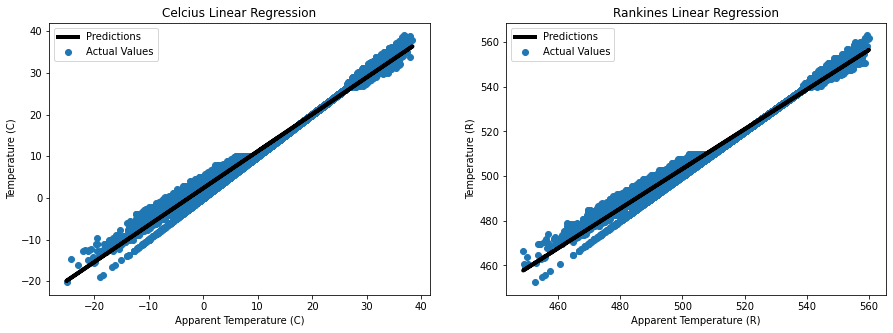

In [5]:
plt.subplots(figsize=(15, 5))
plt.subplot(121)
plt.scatter(x_te_C, y_te_C)
plt.plot(x_te_C, celcius_predictions, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Celcius Linear Regression')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Temperature (C)')

plt.subplot(122)
plt.scatter(x_te_R, y_te_R)
plt.plot(x_te_R, rankines_predictions, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Rankines Linear Regression')
plt.xlabel('Apparent Temperature (R)')
plt.ylabel('Temperature (R)')
plt.show()

#### The plots look the same! The only significant difference is the scale of the axes. That's why the MSE for Rankines is bigger: Rankines are generally greater than Celcius, and so their error is naturally bigger. To take care of this, we use a _baseline_.

### <span style="color:green"><em>end of Problem 1</em></span>

## <span style="color:green"><em>Problem 2</em></span>
Follow the TODOs to calculate normalized scores for your Celcius and Rankines predictions. Then, calculate score = 1 - model_MSE / baseline_MSE. Ask TAs for help!
You should use the same train/test split as before.

In [6]:
test_goal_mean_C = y_te_C.mean() 
baseline_C = np.full((len(celcius_predictions),), test_goal_mean_C)
baseline_C_MSE = mean_squared_error(baseline_C, y_te_C)

score_C = 1 - celcius_MSE / baseline_C_MSE
score_C

0.9853766337901546

In [7]:
test_goal_mean_R = y_te_R.mean() # TODO
baseline_R = np.full((len(celcius_predictions),), test_goal_mean_R)
baseline_R_MSE = mean_squared_error(baseline_R, y_te_R)

score_R = 1 - rankines_MSE / baseline_R_MSE # TODO
score_R

0.9854189805136017

In [8]:
print("sklearn's score for Celcius:", celcius_model.score(x_te_C,y_te_C))
print("your calculated score:", score_C)

sklearn's score for Celcius: 0.9853766337901546
your calculated score: 0.9853766337901546


In [9]:
print("sklearn's score for Rankines:", rankines_model.score(x_te_R,y_te_R))
print("your calculated score:", score_R)

sklearn's score for Rankines: 0.9854189805136017
your calculated score: 0.9854189805136017


### <span style="color:green"><em>end of Problem 2</em></span>

## Bias and Variance

To understand one of the most important concepts in machine learning evaluation, the bias-variance tradeoff, we must first establish what each term means. Simply put, *bias* is the tendency of to systematically over or under-estimate something. For example, if a seesaw has starts off at an incline, then we can say that it is already biased to one side regardless of the weight of the people using it. On the other hand, *variance* measures how far some metric is from a mean value. High variance corresponds to more spread out observations while low variance corresponds to datapoints that're clumped closer together. 

How do these terms work in machine learning models? One way to think about a model that is highly biased is to consider the worst case- where the model fails to learn anything at all. Then, the model is held to its pre-training parameters, and thus biased towards these results. In the case of variance, the opposite is true. Consider a model whose parameters yield a fairly accurate average result. If it exhibits high variance, then its predictions will vary more from that average result, meaning it is more sensitive to any noise in the data. 

## Bias-Variance Tradeoff

In the above example, we see the 'bias-variance tradeoff'. Simply put, the bias and variance of a model's predictions must be balanced as much as possible in order to find the best machine learning model for any task. As you may have guessed, high bias inherently means having low variance while high variance means having low bias- hence, the tradeoff. 

## Overfitting and Underfitting

Having a high bias means your model did not learn as much as it could have (*underfitting*), while having a high variance means the model was responsive to training data to the point that it does not generalize well (*overfitting*).


In [10]:
deaths = pd.read_csv('lecture5dataB.csv')
deaths['Book of Death'].fillna(0,inplace=True)
deaths['Death Year'].fillna(deaths['Death Year'].mean(),inplace=True)
deaths.dropna(subset=['Book Intro Chapter'],inplace=True)
deaths['Death Chapter'].fillna(deaths['Death Chapter'].mean(),inplace=True)
deaths["Allegiances"] = deaths["Allegiances"].str.replace(pat=r'House (?P<one>.*)', repl=lambda m: m.group('one'))

print(",\n".join(deaths["Allegiances"].unique()))

Lannister,
None,
Targaryen,
Greyjoy,
Night's Watch,
Arryn,
Stark,
Tyrell,
Baratheon,
Martell,
Wildling,
Tully


In [11]:
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,299.157377,0.0,40.25,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.000000,3.0,51.00,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,Targaryen,299.157377,0.0,40.25,5.0,1,1,0,0,0,0,1
3,Adrack Humble,Greyjoy,300.000000,5.0,20.00,20.0,1,1,0,0,0,0,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.000000,4.0,35.00,21.0,1,1,1,0,1,1,0


In [12]:
from sklearn.tree import DecisionTreeClassifier

X = deaths[['Death Year','Book Intro Chapter','Book of Death','Death Chapter']]
Y = deaths['Allegiances']
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.2, random_state=42)
train_scores = []
test_scores = []

max_depths = list(range(10,100))
for i in max_depths:
    model = DecisionTreeClassifier(max_depth=i)

    model.fit(x_tr, y_tr)
    
    train_scores.append(model.score(x_tr, y_tr))
    test_scores.append(model.score(x_te, y_te))
    
plt.subplots(figsize=(15,5))
plt.subplots_adjust(wspace=0.4)
plt.subplot(131)
plt.plot(max_depths, train_scores)
plt.title('Training Score: More complex is better')
plt.xlabel('Model Complexity')
plt.ylabel('Training Score')
plt.subplot(132)
plt.plot(max_depths, test_scores)
plt.title("Testing Score: There's a sweetspot")
plt.xlabel('Model Complexity')
plt.ylabel('Testing Score')
plt.subplot(133)
plt.plot(max_depths, np.subtract(train_scores,test_scores))
plt.title("Generalization Error")
plt.xlabel('Model Complexity')
plt.ylabel('(Training Score) - (Testing Score)')
plt.show()

NameError: name 'x_tr' is not defined

## <span style="color:green"><em>Problem 3 (Optional)</em></span>
### NOTE: there's a required Problem 4 at the bottom of the notebook. Don't skip it!
### Part a
Modify the loop above to programmatically find the best `max_depth` for a Decision Tree. Print out the training and testing score of just a model that uses that `max_depth`.
You could also try using sklearn's `GridSearchCV` instead, which we will cover in a later lecture.


### Part b
Now, imagine if you get a `Lannister`'s allegiance wrong, there is a much harsher consequence. To be specific, for any Lannister, the penalty of not predicting that they're a Lannister is 5x the normal penalty. Adjust your scoring mechanism using this new metric (still produce a score normalized by baseline). If you used GridSearchCV above, then see if you can use GridSearchCV's `scoring` parameter.
Note: we're dealing with classification here, not regression, so you'll need to use a classification loss function.

### Part c
Now, imagine that you care twice as much about people whose Death Year is greater than or equal to `300`. Adjust your scoring mechanism using this new metric (still produce a score normalized by baseline). sklearn's typical scoring parameter doesn't allow for this, so you can't use GridSearchCV (as far as I know -- I could be wrong).

### <span style="color:green"><em>end of Problem 3</em></span>

## Feature-Subset Selection Techniques 


A dataset will usually have many features, many of which will not be useful at all. The key is to determine which are helpful in improving your model.

Use the following block to help decide if a particular feature subset selection is helpful for a linear model built on a dataset of a Hungarian city called Szeged. Feel free to modify it to suit your needs.



In [0]:
weather[noncategorical].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


## <span style="color:green"><em>Problem 4</em></span>

Using what you have learned, create a correlation matrix of the data. Use it to decide the three best features to use in predicting Humidity and store those in a list named `three_correlated_features`. Then store the two best features to in a list named `two_correlated_features`. Compare the result of using `three_correlated_features` vs `two_correlated_features` to train a Linear Regression. (When we say compare the results, we mean compare print out the scores).

Your results should show you an important lesson about feature selection- you don't always need to have all features to show almost the same results, and selecting a feature subset of lesser size may be more resource-efficient. 

In [0]:
weather[noncategorical].corr()

In [0]:
features_subset = ['Temperature (C)','Apparent Temperature (C)','Visibility (km)']

# 3 Features
print ('Subset of 3 Features Used to Train: \n')
model = LinearRegression()
xTr,xTe,yTr,yTe = train_test_split(weather[features_subset],weather[['Humidity']],test_size=0.2,random_state=2)
model.fit(xTr,yTr)
test_score = model.score(xTe,yTe)
print ('Test score: ',test_score)

print ('===================================')

# 2 Features
print ('Subset of 2 Features Used to Train: \n')
model = LinearRegression()
xTr,xTe,yTr,yTe = train_test_split(weather[features_subset[:2]],weather[['Humidity']],test_size=0.2,random_state=2)
model.fit(xTr,yTr)
test_score = model.score(xTe,yTe)
print ('Test score: ',test_score)

### <span style="color:green"><em> end of Problem 4 </em></span>